In [1]:
import numpy as np
import matplotlib.pyplot as plt

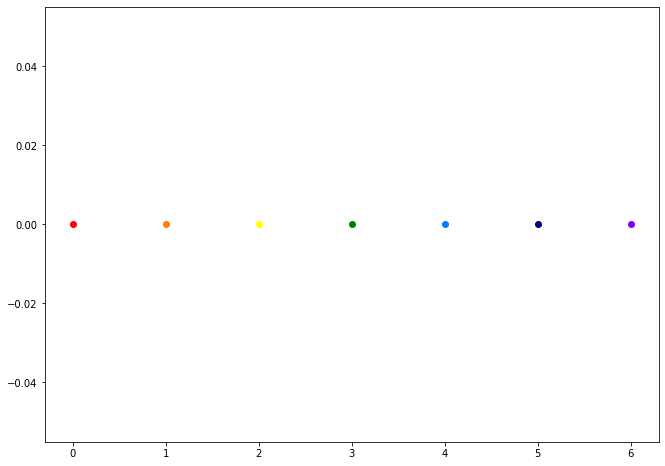

In [2]:
x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 0, 0, 0, 0, 0, 0]

plt.figure(figsize=(11, 8))
plt.scatter(x[0], y[0], c='#ff0000');
plt.scatter(x[1], y[1], c='#ff8000');
plt.scatter(x[2], y[2], c='#ffff00');
plt.scatter(x[3], y[3], c='#008000');
plt.scatter(x[4], y[4], c='#0080ff');
plt.scatter(x[5], y[5], c='#000080');
plt.scatter(x[6], y[6], c='#8000ff');

In [3]:
class Dot:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
    
    def plot(self, size=30):
        plt.scatter(x=self.x, y=self.y, c=self.color, s=size)


In [4]:
class Dots:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.color = color
    
    def plot(self, size=30):
        plt.scatter(x=self.x, y=self.y, c=self.color, s=size)

In [5]:
# 빨, 주, 노, 초, 파, 남, 보
colors = ['#ff0000', '#ff8000', '#ffff00', '#008000', '#0080ff', '#000080', '#8000ff']

In [6]:
li = []
for i in range(len(colors)):
    li.append(Dot(i, 0, colors[i]))

li

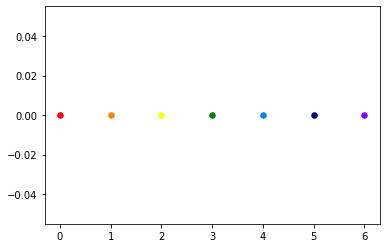

In [7]:
for dot in li:
    dot.plot()

In [8]:
# '#ffff00' -> (255, 255, 0)
def code2num(code):
    code = code.replace('#', '')
    r = int(code[:2], 16)
    g = int(code[2:4], 16)
    b = int(code[4:], 16)
    return (r, g, b)

# (255, 255, 0) -> '#ffff00
def num2code(num):
    r = '{:x}'.format(num[0])
    if (len(r) == 1):
        r = '0' + r

    g = '{:x}'.format(num[1])
    if (len(g) == 1):
        g = '0' + g

    b = '{:x}'.format(num[2])
    if (len(b) == 1):
        b = '0' + b

    return '#' + r + g + b

In [9]:
code2num(colors[0])

(255, 0, 0)

In [10]:
num2code((255, 0, 0))

'#ff0000'

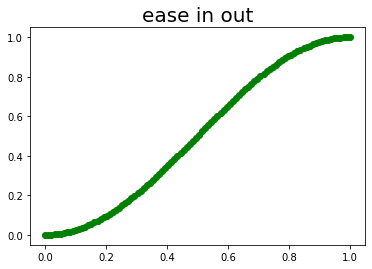

In [11]:
def ease_in_out(start, end, num):
    x = np.linspace(-np.pi/2, np.pi/2, num)
    x = np.sin(x)
    x *= (end - start) / 2
    x += (start + end) / 2
    return x

plt.title('ease in out', fontsize=20)
plt.scatter(x=np.linspace(0, 1, 100), y=ease_in_out(0, 1, 100), c='green');

In [12]:
def line(unit=10, start=0, end=1, colors=colors, y=0, interpolation_func=ease_in_out):
    # start 부터 end 까지 colors 에 있는 색상들을 부드럽게 변화시키는 점 리스트를 생성하는 함수
    
    # params_
        # unit: 각 anchor 사이의 점 개수
        # start: 시작 x 좌표
        # end: 끝 x 좌표
        # colors: 색상 코드들
        # y: y 좌표(line 이라 하나로 고정)
        # interpolation_func: 색상 보간 시 활용할 보간 함수. 단순히 선형으로 보간하면 색상의 변화가 부자연스러움

    total_num = unit * (len(colors) - 1) + 1
    x_s = np.linspace(start, end, total_num)
    y_s = np.full(shape=total_num, fill_value=y)
    color_s = np.array([])

    for i in range(len(colors)-1):
        xs = x_s[unit*i : unit*(i+1)]

        c_start = code2num(colors[i])
        c_end = code2num(colors[i+1])

        reds = interpolation_func(c_start[0], c_end[0], unit+1)[:-1].astype(int)
        greens = interpolation_func(c_start[1], c_end[1], unit+1)[:-1].astype(int)
        blues = interpolation_func(c_start[2], c_end[2], unit+1)[:-1].astype(int)

        color_s = np.append(color_s, [num2code((reds[j], greens[j], blues[j])) for j in range(unit)])
    
    color_s = np.append(color_s, colors[-1])

    return Dots(x_s, y_s, color_s)

In [13]:
a = line(unit=100)

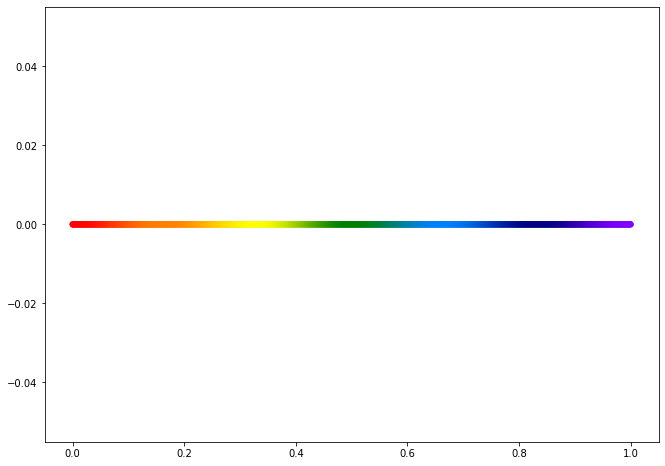

In [229]:
plt.figure(figsize=(11, 8))
a.plot()

In [76]:
def roll(dots, wheel=1, radius_increment=1, eccentricity=0):
    # 직선을 말아주는 함수

    # params_
        # dots: 직선
        # wheel: 몇 바퀴 말지
        # radius_increment: 한 바퀴 말릴 때마다 늘어나는 반경
        # eccentricity: 이심률
    
    # 끝 지점 각도
    w_max = np.pi * 2 * wheel
    # 점 개수
    total_num = len(dots.x)

    # 각도 리스트
    theta_s = np.linspace(0, w_max, total_num)

    # 점 사이의 간격을 동일하게 맞추기 위한 장치. 이것이 없으면 점들이 중앙 부분에만 몰려있게 됨
    # 루트 함수를 씌우다보니 첫 점이 좀 이상하게 변환되어 첫 점을 두 번째 점으로 가까이 당김
    theta_s[0] += theta_s[1] - theta_s[0]
    # 루트 함수로 변환 -> 전체적으로 값을 키움 -> 중앙 부분에 몰려있던 점들이 골고루 퍼지게 됨
    theta_s = np.sqrt(w_max * theta_s)

    # x 좌표 목록
    x_s = radius_increment / (np.pi*2) * theta_s * np.cos(theta_s)
    # y 좌표 목록
    y_s = radius_increment / (np.pi*2) * theta_s * np.sin(theta_s)
    # 이심률 적용
    if eccentricity != 0:
        y_s *= np.sqrt(1 - np.power(eccentricity, 2))

    return Dots(x_s, y_s, dots.color)

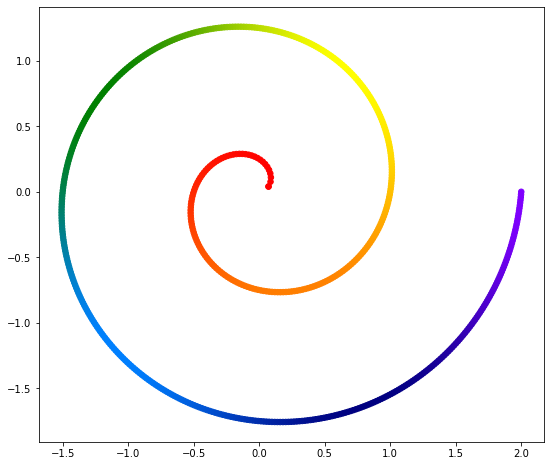

In [127]:
a_roll = roll(a, wheel=2)
plt.figure(figsize=(11, 8))
plt.gca().set_aspect('equal')
a_roll.plot()

In [128]:
my_roll = np.array([[a_roll.x[i], a_roll.y[i]] for i in range(len(a_roll.x))])

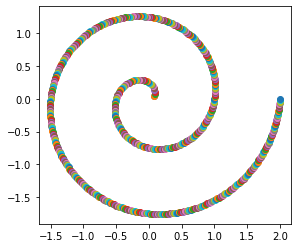

In [129]:
plt.gca().set_aspect('equal')
for coord in my_roll:
    plt.scatter(x=coord[0], y=coord[1])

In [130]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import tensorflow as tf

In [131]:
train, test = train_test_split(my_roll, test_size=0.2)

In [132]:
LATENT_DIM = 1

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Dense(2, activation='relu'),
            layers.Dense(2, activation='relu'),
            layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(2, activation='relu'),
            # layers.Dense(4, activation='relu'),
            layers.Dense(2, activation='sigmoid')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [133]:
model = Autoencoder(LATENT_DIM)

In [134]:
model.compile(optimizer='adam', loss='mse')

In [237]:
model.fit(train, train,
          epochs=20,
          shuffle=True,
          validation_data=(test, test))

Epoch 1/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2847 - val_loss: 0.2936
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2831 - val_loss: 0.2922
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2817 - val_loss: 0.2909
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2804 - val_loss: 0.2898
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2793 - val_loss: 0.2887
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2780 - val_loss: 0.2879
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2771 - val_loss: 0.2870
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 0.2762 - val_loss: 0.2861
Epoch 9/20
15/15 [==============================] - 0s 5ms/step - loss: 0.2752 - val_loss: 0.2854
Epoch 10/20
15/15 [==============================] - 0s 6ms/step - loss: 0.2743 - val_loss: 0.2846
Epoch 11/20
15/15 [

In [238]:
model.summary()

Model: "autoencoder_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_92 (Sequential)  (None, 1)                 15        
                                                                 
 sequential_93 (Sequential)  (None, 2)                 10        
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [239]:
train.shape

(480, 2)

In [240]:
encoded = model.encoder(my_roll).numpy()
encoded

array([[1.9225857],
       [1.9225857],
       [1.9279506],
       [1.9269025],
       [1.9224322],
       [1.91574  ],
       [1.9074628],
       [1.8979912],
       [1.8875873],
       [1.8764393],
       [1.8646877],
       [1.8524415],
       [1.8397884],
       [1.8267992],
       [1.8135324],
       [1.8000383],
       [1.7863593],
       [1.7725317],
       [1.7585881],
       [1.744556 ],
       [1.7304606],
       [1.7163241],
       [1.7021658],
       [1.6880043],
       [1.6738551],
       [1.659733 ],
       [1.6456513],
       [1.6316221],
       [1.6176565],
       [1.6037648],
       [1.589956 ],
       [1.5762391],
       [1.5626221],
       [1.5491121],
       [1.5357158],
       [1.52244  ],
       [1.50929  ],
       [1.4962716],
       [1.4833896],
       [1.4706489],
       [1.4580536],
       [1.4456078],
       [1.4333153],
       [1.4211797],
       [1.409204 ],
       [1.3973913],
       [1.3857446],
       [1.3742661],
       [1.3629584],
       [1.351824 ],


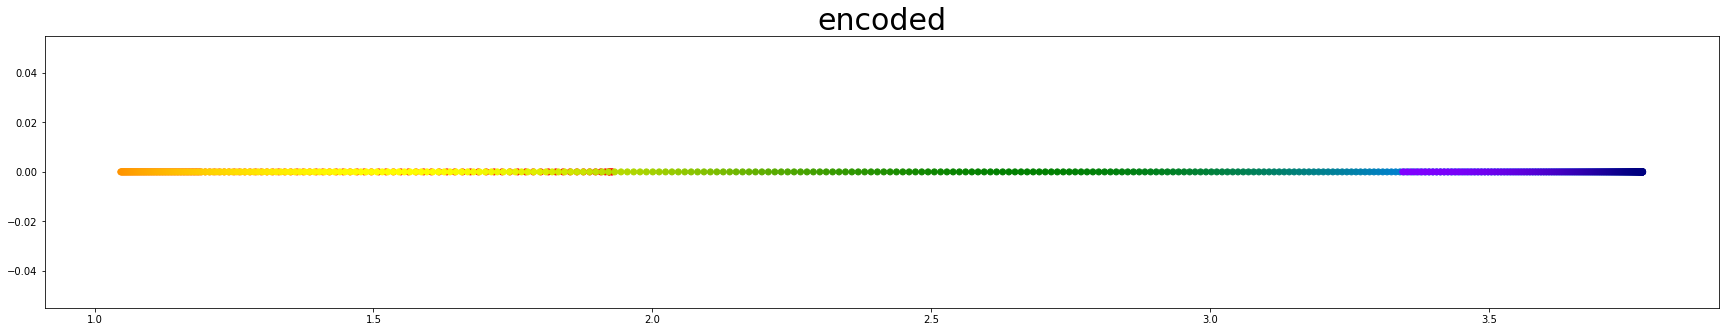

In [241]:
plt.figure(figsize=(30, 5))
plt.title('encoded', fontsize=30)
plt.scatter(x=encoded, y=np.full(len(encoded), 0), c=a_roll.color);

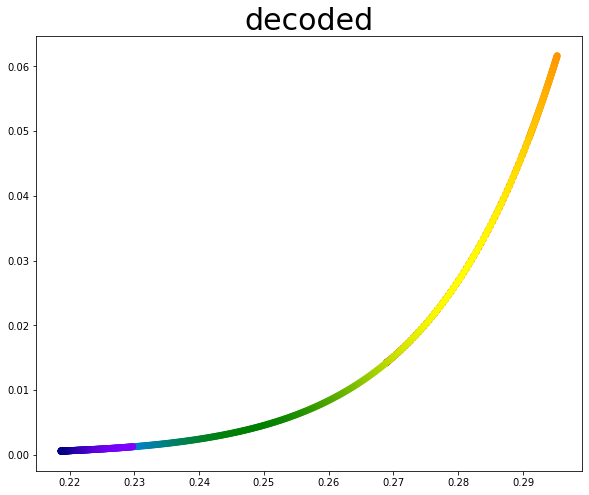

In [242]:
decoded = model.decoder(encoded).numpy()
plt.figure(figsize=(11, 8))
plt.gca().set_aspect('equal')
plt.title('decoded', fontsize=30)
plt.scatter(x=decoded[:, 0], y=decoded[:, 1], c=a_roll.color);

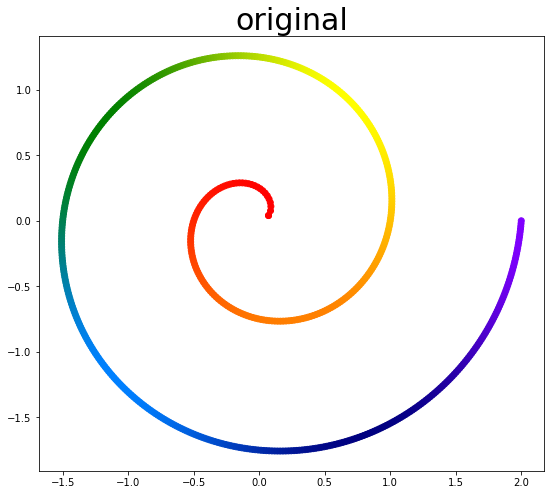

In [141]:
plt.figure(figsize=(11, 8))
plt.gca().set_aspect('equal')
plt.title('original', fontsize=30)
plt.scatter(x=my_roll[:, 0], y=my_roll[:, 1], c=a_roll.color);

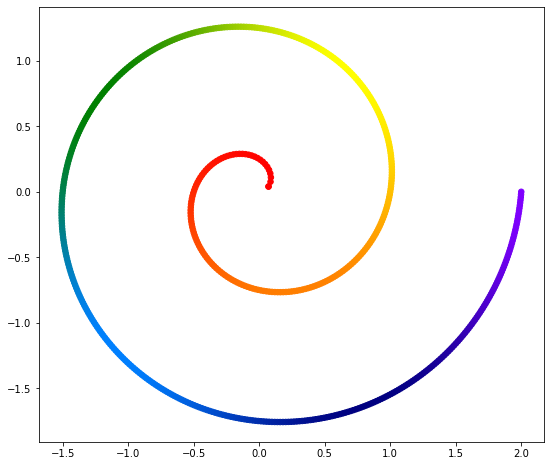

In [255]:
a = line(unit=100)

a_roll = roll(a, wheel=2)
plt.figure(figsize=(11, 8))
plt.gca().set_aspect('equal')
a_roll.plot()

my_roll = np.array([[a_roll.x[i], a_roll.y[i]] for i in range(len(a_roll.x))])
train, test = train_test_split(my_roll, test_size=0.2)

Epoch 1/30
15/15 [==============================] - 1s 17ms/step - loss: 1.3798 - val_loss: 1.3811
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 1.3752 - val_loss: 1.3768
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 1.3706 - val_loss: 1.3727
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3660 - val_loss: 1.3686
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3615 - val_loss: 1.3645
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3570 - val_loss: 1.3604
Epoch 7/30
15/15 [==============================] - 0s 4ms/step - loss: 1.3526 - val_loss: 1.3564
Epoch 8/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3482 - val_loss: 1.3525
Epoch 9/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3439 - val_loss: 1.3485
Epoch 10/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3396 - val_loss: 1.3446
Epoch 11/30
15/15 

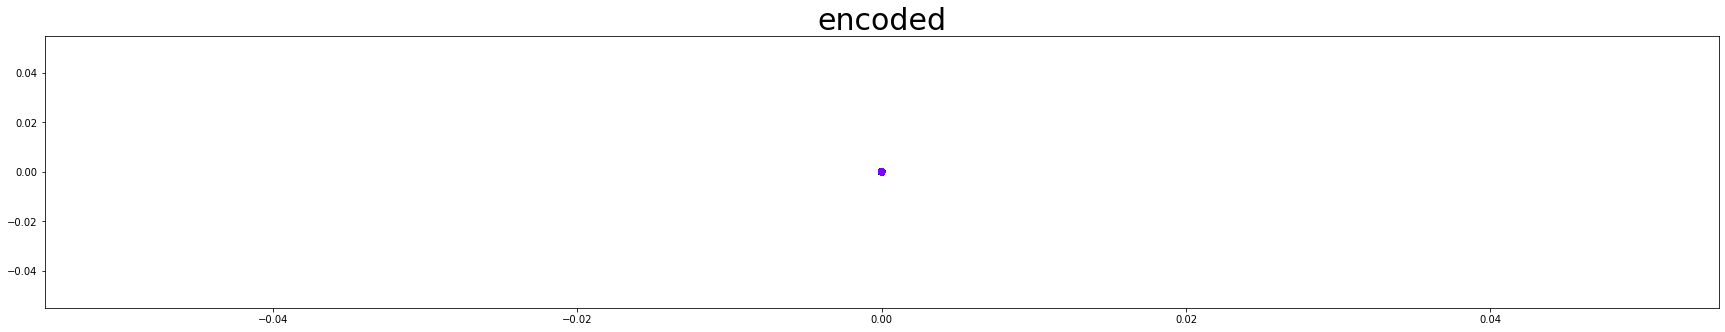

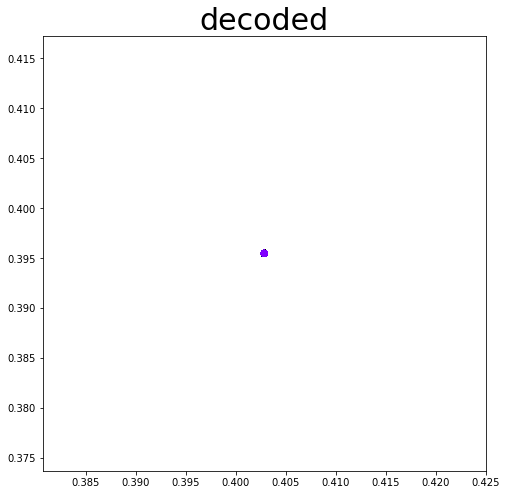

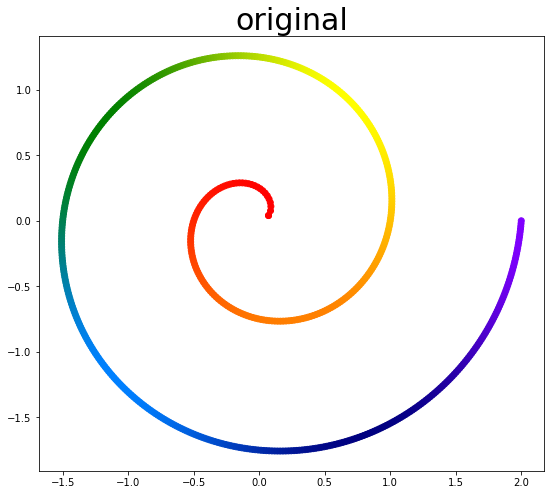

In [267]:
def ttt():
    LATENT_DIM = 1

    class Autoencoder(Model):
        def __init__(self, latent_dim):
            super(Autoencoder, self).__init__()
            self.latent_dim = latent_dim
            self.encoder = tf.keras.Sequential([
                layers.Dense(2, activation='relu'),
                layers.Dense(2, activation='relu'),
                layers.Dense(2, activation='relu'),
                # layers.Dense(2, activation='relu'),
                # layers.Dense(2, activation='relu'),
                layers.Dense(latent_dim, activation='relu')
            ])
            self.decoder = tf.keras.Sequential([
                layers.Dense(2, activation='relu'),
                layers.Dense(2, activation='relu'),
                # layers.Dense(2, activation='relu'),
                # layers.Dense(2, activation='relu'),
                layers.Dense(2, activation='sigmoid')
            ])
        
        def call(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    model = Autoencoder(LATENT_DIM)

    model.compile(optimizer='adam', loss='mse')

    model.fit(train, train,
          epochs=30,
          shuffle=True,
          validation_data=(test, test))
    
    encoded = model.encoder(my_roll).numpy()

    decoded = model.decoder(encoded).numpy()

    plt.figure(figsize=(30, 5))
    plt.title('encoded', fontsize=30)
    plt.scatter(x=encoded, y=np.full(len(encoded), 0), c=a_roll.color);

    plt.figure(figsize=(11, 8))
    plt.gca().set_aspect('equal')
    plt.title('decoded', fontsize=30)
    plt.scatter(x=decoded[:, 0], y=decoded[:, 1], c=a_roll.color);

    plt.figure(figsize=(11, 8))
    plt.gca().set_aspect('equal')
    plt.title('original', fontsize=30)
    plt.scatter(x=my_roll[:, 0], y=my_roll[:, 1], c=a_roll.color);

ttt()